# Bank Marketing Campaign

**Problem Description**

ABC Bank aims to sell deposit products to customers efficiently by identifying potential buyers. To achieve this goal, they aim to develop a machine learning model that predicts whether customers will purchase deposits based on past interactions with banks or other financial institutions. By utilizing this model, Bank ABC can focus its marketing efforts on customers who have a higher likelihood of purchasing the product, thereby saving resources and optimizing their marketing strategy.



**Business Understanding**

In this case Bank ABC wants to:
- Identify potential customers who are more likely to purchase their term deposit product.
- Optimize marketing efforts by targeting specific customer segments with higher chances of conversion.
- Develop a machine learning model to automate the process of customer segmentation and prediction.

## Import Data

In [100]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('Dataset/bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [68]:
df.shape

(41188, 21)

## Data Understanding

**Attribute Information:**

Input variables:

bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')


related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

### Check null value

In [69]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There's no null value in the dataset

### Check column data types

In [70]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Check data statistic

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Select Columns by data type

In [72]:
numeric_cols = []
non_numeric_cols=[]
datetime_cols = []

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
non_numeric_cols = df.select_dtypes(include=['object']).columns.to_list()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.to_list()

print(f'numeric cols: {numeric_cols}\nnon-numeric cols: {non_numeric_cols}\ndatetime cols: {datetime_cols}')

numeric cols: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
non-numeric cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
datetime cols: []


In [73]:
df[numeric_cols].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [74]:
df[non_numeric_cols].head(25)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
5,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,no
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no
7,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent,no
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,no
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent,no


The columns month and day_of_week must be converted to datetime

In [75]:
df[['month', 'day_of_week']].nunique()

month          10
day_of_week     5
dtype: int64

In [76]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [77]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

#### Converting month and day_of_week to datetime

In [78]:
from datetime import datetime, timedelta

month_mapping = {
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4
}
day_of_week_mapping = {
    'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6
}

# Fungsi untuk menghasilkan tanggal berdasarkan bulan dan hari dalam satu tahun tertentu
def calculate_date(year, month, day_of_week):
    base_date = datetime(year, month_mapping[month], 1)
    day_offset = (day_of_week_mapping[day_of_week] - base_date.weekday()) % 7
    date = base_date + timedelta(days=day_offset)
    return date

# Menghitung tanggal-tanggal untuk kolom baru 'datetime'
df['datetime'] = df.apply(lambda row: calculate_date(2008, row['month'], row['day_of_week']), axis=1)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,datetime
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05


In [79]:
non_numeric_cols.append('datetime')

In [80]:
df[non_numeric_cols].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,datetime
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,2008-05-05
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,2008-05-05
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,2008-05-05
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,2008-05-05
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,2008-05-05


In [81]:
df[non_numeric_cols].dtypes

job                    object
marital                object
education              object
default                object
housing                object
loan                   object
contact                object
month                  object
day_of_week            object
poutcome               object
y                      object
datetime       datetime64[ns]
dtype: object

#### Drop unused columns

In [82]:
df = df.drop(columns=['month', 'day_of_week'])

In [86]:
non_numeric_cols.remove('month')
non_numeric_cols.remove('day_of_week')

In [87]:
df[non_numeric_cols].head()

,job,marital,education,default,housing,loan,contact,poutcome,y,datetime
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no,2008-05-05
1,services,married,high.school,unknown,no,no,telephone,nonexistent,no,2008-05-05
2,services,married,high.school,no,yes,no,telephone,nonexistent,no,2008-05-05
3,admin.,married,basic.6y,no,no,no,telephone,nonexistent,no,2008-05-05
4,services,married,high.school,no,no,yes,telephone,nonexistent,no,2008-05-05


#### Check skewness and outliers

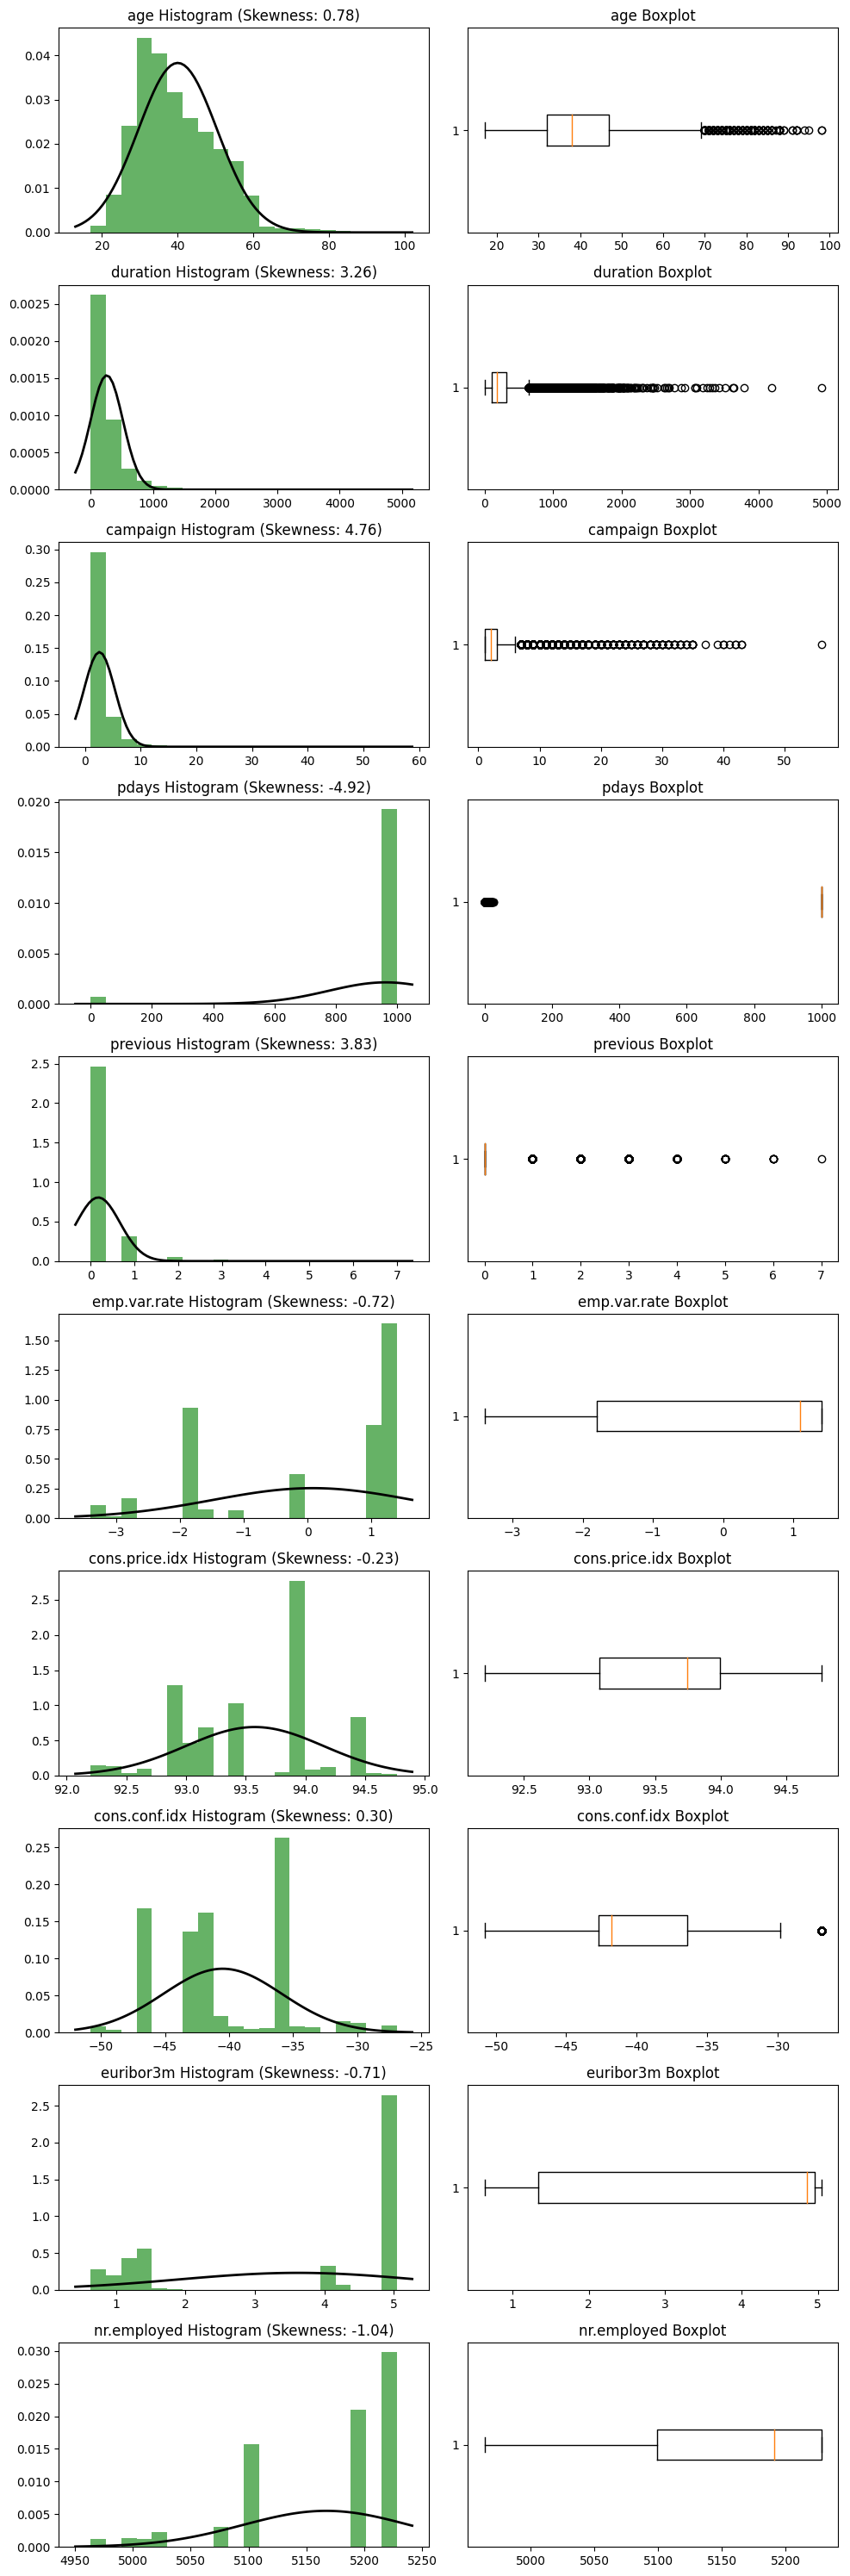

In [104]:
import matplotlib.pyplot as plt
from scipy.stats import norm

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(10, 30))

for i, (column_name, column_data) in enumerate(df[numeric_cols].items()):
    axes[i, 0].hist(column_data, bins=20, density=True, alpha=0.6, color='g')
    axes[i, 0].set_title(f'{column_name} Histogram')

    # add gaussian distributions
    mu, std = norm.fit(column_data)
    xmin, xmax = axes[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i, 0].plot(x, p, 'k', linewidth=2)

    # add skewness
    skewness = np.mean((column_data - np.mean(column_data))**3) / np.mean((column_data - np.mean(column_data))**2)**(3/2)
    axes[i, 0].set_title(f'{column_name} Histogram (Skewness: {skewness:.2f})')

    # add boxplot
    axes[i, 1].boxplot(column_data, vert=False)
    axes[i, 1].set_title(f'{column_name} Boxplot')

plt.tight_layout()
plt.show()